In [1]:
#Add Imports
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Load CSV file
cmpd_violent_crimes = pd.read_csv('cmpd_violent_cleaned_data_df')

In [3]:
#Check File


In [4]:
#Change Unnamed:0.1 to a datetime
cmpd_violent_crimes.rename(columns={"Unnamed: 0.1":"Date"},inplace=True)
cmpd_violent_crimes['Date'] = pd.to_datetime(cmpd_violent_crimes['Date'], format='%m/%d/%Y')

#Loc to get all rows that have a date on or after Jan 2022 (test)
#Before Jan 2022 is the train
test = cmpd_violent_crimes[cmpd_violent_crimes['Date'] >= pd.Timestamp('1/1/2022')]
train = cmpd_violent_crimes[cmpd_violent_crimes['Date'] < pd.Timestamp('1/1/2022')]


train = train.iloc[:,2:14] # check this index, should be 14?
test = test.iloc[:,2:14]

#cmpd_violent_crimes = cmpd_violent_crimes.iloc[:,2:15]


In [5]:
#Using the describe function
train.shape

(84, 12)

In [6]:
#Acquire Data types

# cmpd_violent_crimes.info()
train.head()


,"Aggravated Assault-Fists,Feet, etc.",Aggravated Assault-Gun,Aggravated Assault-Knife,Aggravated Assault-Other Weapon,Armed Robbery,Attempted Rape,Homicide,Non-Fatal Gunshot Injury,Rape,Strong Arm Robbery,Violent Crime,Grand Total
0,11,237,41,40,99,0.0,8,20,21,34,491,1002
1,3,134,40,46,67,1.0,5,16,25,25,346,708
2,8,141,48,52,78,3.0,4,13,26,48,408,829
3,12,132,54,57,84,2.0,6,15,18,42,407,829
4,10,174,71,71,113,2.0,1,27,24,60,526,1079


In [7]:
train.info

<bound method DataFrame.info of     Aggravated Assault-Fists,Feet, etc.  Aggravated Assault-Gun  \
0                                    11                     237   
1                                     3                     134   
2                                     8                     141   
3                                    12                     132   
4                                    10                     174   
..                                  ...                     ...   
79                                   14                     343   
80                                    5                     317   
81                                   10                     310   
82                                    8                     330   
83                                   12                     307   

    Aggravated Assault-Knife  Aggravated Assault-Other Weapon  Armed Robbery  \
0                         41                               40             99   
1  

In [8]:
#Create the test independent and dependent values


# TODO: add more features for x's
x_train = train.iloc[:,5].values.reshape(-1,1)
y_train = train.iloc[:,11].values.reshape(-1,1) # check the index, should be 12?

x_test = test.iloc[:,5].values.reshape(-1,1)
y_test = test.iloc[:,11].values.reshape(-1,1)


In [9]:
#Creating variables
#Decision tree regression or SVR (Look into)
# TODO: try chaning out model
Violent_linear_regressor = LinearRegression()

In [10]:
#Fitting model

Violent_linear_regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
#Plot variable created

r_squared = Violent_linear_regressor.score(x_test,y_test)

crime_pred = Violent_linear_regressor.predict(x_test)

In [12]:
r_squared

-0.3573291407965975

In [13]:
crime_pred

array([[1181.34194644],
       [1131.47585817],
       [1181.34194644],
       [1181.34194644],
       [1131.47585817],
       [1181.34194644],
       [1156.4089023 ],
       [1156.4089023 ],
       [1156.4089023 ],
       [1156.4089023 ],
       [1206.27499057],
       [1106.54281403]])

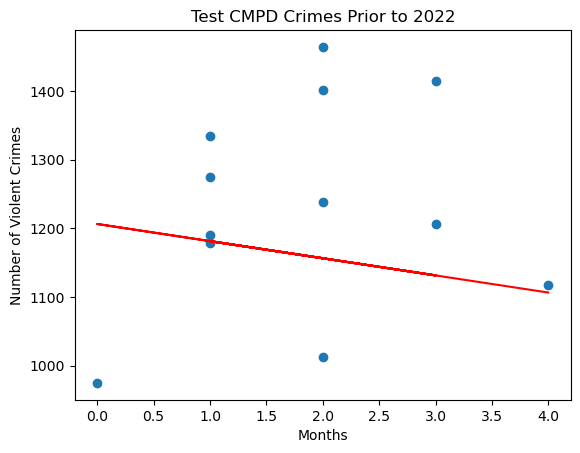

In [14]:
#Ploting Linear Regression on a Scatter plot
plt.title("Test CMPD Crimes Prior to 2022")
plt.xlabel("Months")
plt.ylabel("Number of Violent Crimes")
plt.scatter(x_test, y_test)
plt.plot(x_test, crime_pred, color='red')
plt.show()

In [21]:
train_r_squared = Violent_linear_regressor.score(x_train,y_train)

train_crime_pred = Violent_linear_regressor.predict(x_train)

In [22]:
train_r_squared

0.021621634930322764

In [23]:
train_crime_pred

array([[1206.27499057],
       [1181.34194644],
       [1131.47585817],
       [1156.4089023 ],
       [1156.4089023 ],
       [1181.34194644],
       [1156.4089023 ],
       [1181.34194644],
       [1181.34194644],
       [1206.27499057],
       [1181.34194644],
       [1131.47585817],
       [1156.4089023 ],
       [1156.4089023 ],
       [1181.34194644],
       [1206.27499057],
       [1181.34194644],
       [1181.34194644],
       [1181.34194644],
       [1156.4089023 ],
       [1181.34194644],
       [1156.4089023 ],
       [1181.34194644],
       [1181.34194644],
       [1156.4089023 ],
       [1181.34194644],
       [1131.47585817],
       [1081.6097699 ],
       [1131.47585817],
       [1106.54281403],
       [1106.54281403],
       [1206.27499057],
       [1206.27499057],
       [1156.4089023 ],
       [1181.34194644],
       [1206.27499057],
       [1206.27499057],
       [1181.34194644],
       [1131.47585817],
       [1206.27499057],
       [1156.4089023 ],
       [1181.341

In [ ]:
#Testing set

# Delete this, don't use

# from sklearn.model_selection import train_test_split

# x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=1,stratify=y)

# x_train.shape

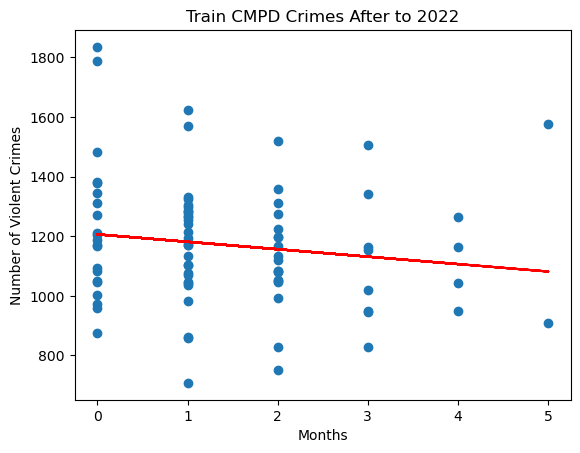

In [25]:
#Ploting Linear Regression on a Scatter plot
plt.title("Train CMPD Crimes After to 2022")
plt.xlabel("Months")
plt.ylabel("Number of Violent Crimes")
plt.scatter(x_train, y_train)
plt.plot(x_train, train_crime_pred, color='red')
plt.show()